In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt

In [2]:
# parametri fisici oscillatore
m = 1.
omega = 1.
#k_B = 1.38065156*10**(-23)
k_B = 1.
T = 20
beta = 1/(k_B*T)

In [3]:
# parametro per far variare r
r_variabile = [0.001*i for i in range(0, 201)]

In [4]:
#r_variabile

In [5]:
np.pi

3.141592653589793

In [6]:
def gibbs_distribution_nonlinear(q, p):
    return np.exp(-beta*((p**2)/(2*m) + r*np.cos(q)))

# Definizione della proposta di transizione (scelta semplice per dimostrazione)
def proposal(x, y):
    x_new = x + np.random.normal()
    x_new = x_new % (2*np.pi)
    y_new = y + np.random.normal()
    return x_new, y_new

In [7]:
# Parametri dell'algoritmo di campionamento
num_samples = 100000
burn_in = 5000

In [8]:
viriale_p = []
viriale_q = []

In [9]:
for r in r_variabile:
    
    # Inizializzazione campionamento
    current_q, current_p = 0.0, 0.0
    samples = []
    
    # Ciclo di campionamento delle q e delle p
    for _ in range(num_samples + burn_in):
        proposed_q, proposed_p = proposal(current_q, current_p)
    
        acceptance_ratio = min(1, gibbs_distribution_nonlinear(proposed_q, proposed_p) / gibbs_distribution_nonlinear(current_q, current_p))
    
        if np.random.uniform() < acceptance_ratio:
            current_q, current_p = proposed_q, proposed_p
    
        if _ >= burn_in:
            samples.append((current_q, current_p))
            
    # Estrazione dei campioni di x e y
    sampled_q = [sample[0] for sample in samples]
    sampled_p = [sample[1] for sample in samples]

    sampled_q = np.array(sampled_q) 
    sampled_p = np.array(sampled_p)
    
    viriale_p.append(np.mean(sampled_p*sampled_p/m))
    viriale_q.append(-r*np.mean(sampled_q*np.sin(sampled_q)))

In [10]:
r_variabile = np.array(r_variabile)

viriale_p = np.array(viriale_p)
viriale_q = np.array(viriale_q)

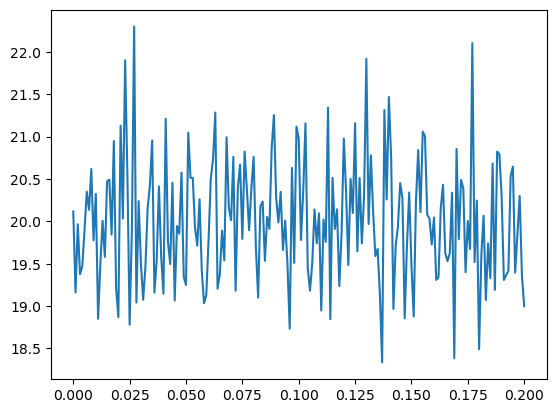

In [11]:
plt.plot(r_variabile, viriale_p)

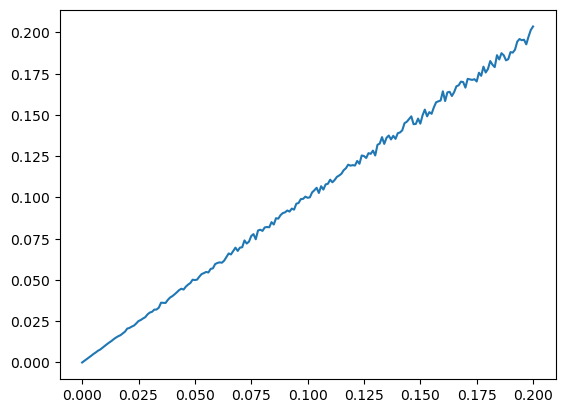

In [12]:
plt.plot(r_variabile, viriale_q)

In [13]:
# Inizializzazione campionamento
current_q, current_p = 0.0, 0.0
samples = []

# Ciclo di campionamento delle q e delle p
for _ in range(num_samples + burn_in):
    proposed_q, proposed_p = proposal(current_q, current_p)
    
    acceptance_ratio = min(1, gibbs_distribution_nonlinear(proposed_q, proposed_p) / gibbs_distribution_nonlinear(current_q, current_p))
    
    if np.random.uniform() < acceptance_ratio:
        current_q, current_p = proposed_q, proposed_p
    
    if _ >= burn_in:
        samples.append((current_q, current_p))
        
# Estrazione dei campioni di x e y
sampled_q = [sample[0] for sample in samples]
sampled_p = [sample[1] for sample in samples]

sampled_q = np.array(sampled_q) 
sampled_p = np.array(sampled_p)

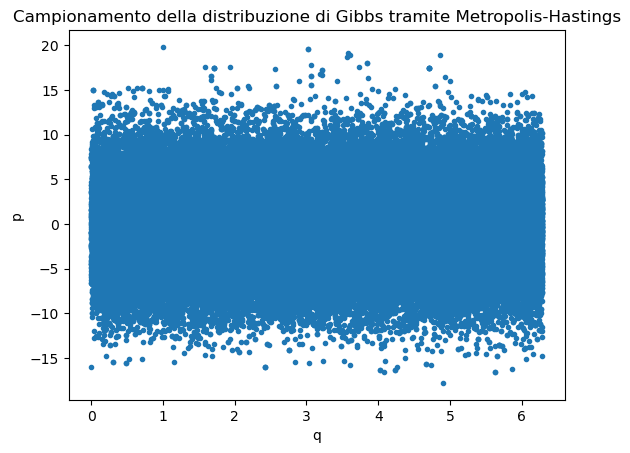

In [14]:
# Visualizzazione dei risultati
plt.scatter(sampled_q, sampled_p, marker='.')
plt.xlabel('q')
plt.ylabel('p')
plt.title('Campionamento della distribuzione di Gibbs tramite Metropolis-Hastings')
plt.show()

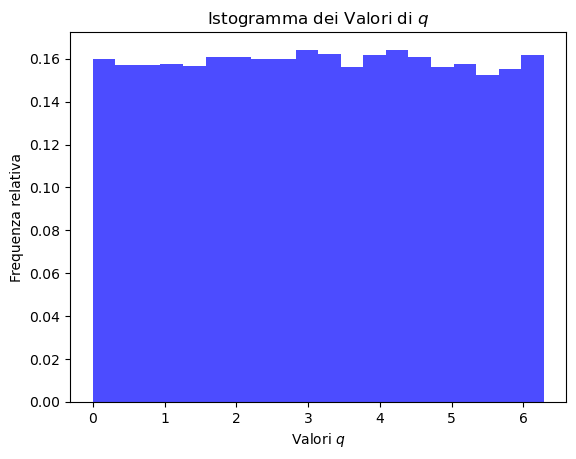

In [15]:
# Crea l'istogramma
plt.hist(sampled_q, bins=20, density=True, alpha=0.7, color='blue')  # `bins` definisce il numero di bin nell'istogramma

# Aggiungi etichette e titolo
plt.xlabel('Valori $q$')
plt.ylabel('Frequenza relativa')
plt.title('Istogramma dei Valori di $q$')

# Mostra il plot
plt.show()

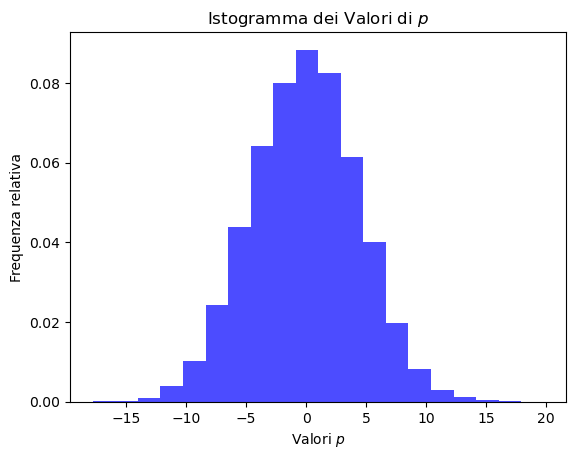

In [16]:
# Crea l'istogramma
plt.hist(sampled_p, bins=20, density=True, alpha=0.7, color='blue')  # `bins` definisce il numero di bin nell'istogramma

# Aggiungi etichette e titolo
plt.xlabel('Valori $p$')
plt.ylabel('Frequenza relativa')
plt.title('Istogramma dei Valori di $p$')

# Mostra il plot
plt.show()

In [17]:
kinetic = (sampled_p*sampled_p)/(2*m)
potential = r*np.cos(sampled_q)
energy = kinetic + potential

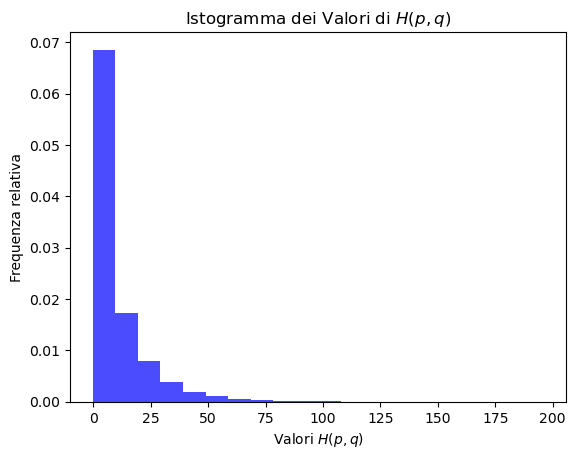

In [18]:
# Crea l'istogramma
plt.hist(energy, bins=20, density=True, alpha=0.7, color='blue')  # `bins` definisce il numero di bin nell'istogramma

# Aggiungi etichette e titolo
plt.xlabel('Valori $H(p,q)$')
plt.ylabel('Frequenza relativa')
plt.title('Istogramma dei Valori di $H(p,q)$')

# Mostra il plot
plt.show()

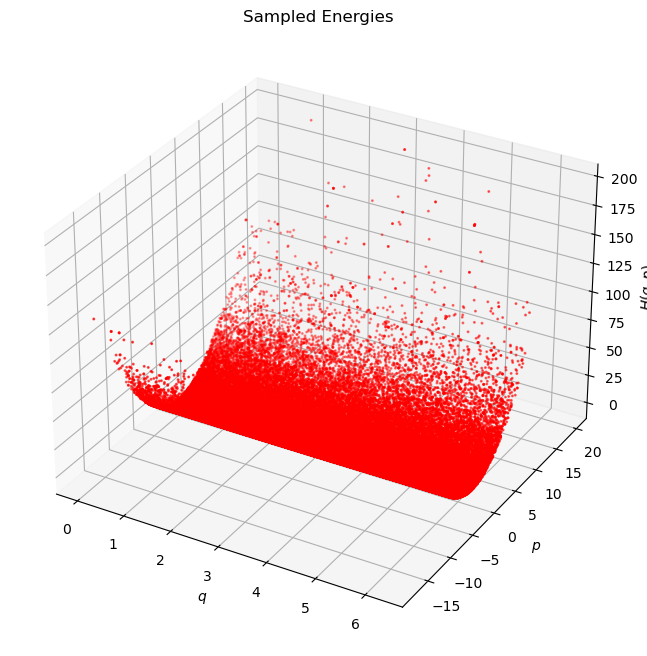

In [19]:
# Crea una figura e un'area 3D
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')

# Crea lo scatter plot in 3D
ax.scatter(sampled_q, sampled_p, energy, c='r', marker='o', s=1.2)

# Etichette degli assi
ax.set_xlabel('$q$')
ax.set_ylabel('$p$')
ax.set_zlabel('$H(q,p)$')

# Titolo del plot
ax.set_title('Sampled Energies')

# Mostra il plot
plt.show()

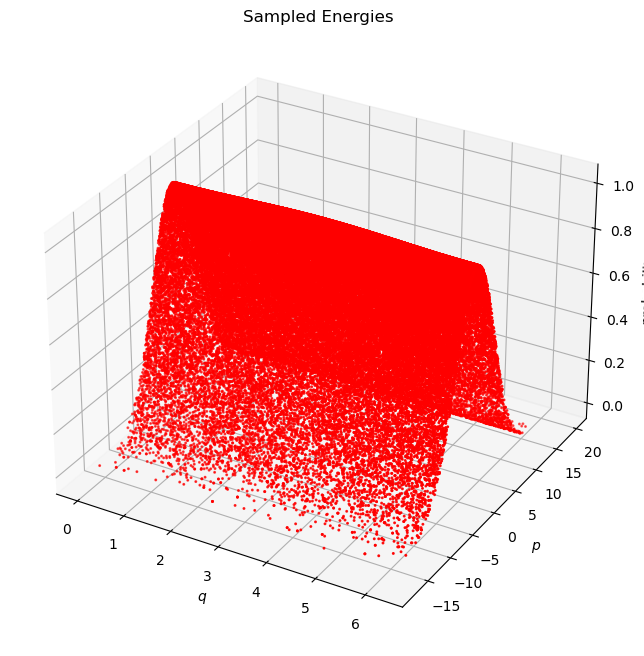

In [20]:
# Crea una figura e un'area 3D
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')

# Crea lo scatter plot in 3D
ax.scatter(sampled_q, sampled_p, np.exp(-beta*energy), c='r', marker='o', s=1.2)

# Etichette degli assi
ax.set_xlabel('$q$')
ax.set_ylabel('$p$')
ax.set_zlabel('probability')

# Titolo del plot
ax.set_title('Sampled Energies')

# Mostra il plot
plt.show()